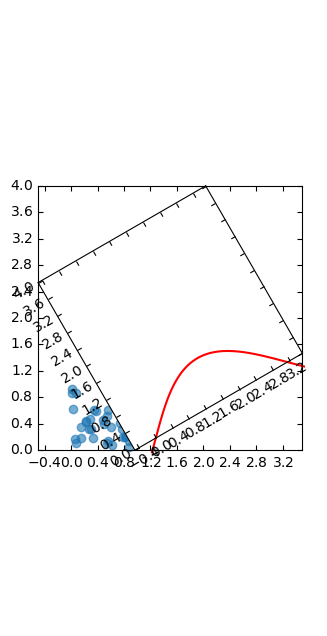

In [17]:
from matplotlib.transforms import Affine2D 
import mpl_toolkits.axisartist.floating_axes as floating_axes 
import matplotlib.pyplot as plt
import numpy as np

def setup_axes(fig, rect, rotation, axisScale):
    tr = Affine2D().scale(axisScale[0], axisScale[1]).rotate_deg(rotation)
    grid_helper = floating_axes.GridHelperCurveLinear(tr, extremes=(-0.5, 3.5, 0, 4))
    ax = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax)
    aux_ax = ax.get_aux_axes(tr)
    return ax, aux_ax

# Create main figure
fig  = plt.figure(1, figsize=(8, 8))

# Setup axes 
axisOrientation = [0, 30]    # Rotate second plot by 30 degrees
axisScale = [[1,1], [0.5,0.5]]   # Uniform scale for both plots
axisPosition = [121,121]     # Position the plots within the figure

# Container to hold the subplots
axes = []

for i in range(len(axisOrientation)):
    ax, aux_ax = setup_axes(fig, axisPosition[i], axisOrientation[i], axisScale[i])
    if i == 0:
        # Create scatter plot on first subplot
        X_scatter = np.random.rand(50)
        Y_scatter = np.random.rand(50)
        aux_ax.scatter(X_scatter, Y_scatter, alpha=0.6)
    else:
        # Create line plot on second subplot
        X_line = np.linspace(-0.5, 3.5, 100)
        Y_line = np.sin(X_line)
        aux_ax.plot(X_line, Y_line, 'r')

    axes.append(aux_ax)

# Visual adjustment
fig.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()

In [14]:
from matplotlib.transforms import Affine2D 
import mpl_toolkits.axisartist.floating_axes as floating_axes 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
import numpy as np

def setup_axes(parent_axes, pos, rotation, axisScale):
    # posiiton and size w.r.t. parent axes.
    [x, y, width, height] = pos
    # Calculate the coordinates in the figure space
    bbox0 = parent_axes.get_position()
    bbox0_fig = [bbox0.x0 + x*bbox0.width, bbox0.y0 + y*bbox0.height, width*bbox0.width, height*bbox0.height]
    # Create a new callable affine object
    tr_rotate = Affine2D().rotate_deg(rotation)
    tr_scale = Affine2D().scale(axisScale[0], axisScale[1])
    tr = tr_rotate + tr_scale + parent_axes.transData
    grid_helper = floating_axes.GridHelperCurveLinear(tr, extremes=(-0.5, 3.5, 0, 4))
    ax1 = floating_axes.FloatingSubplot(fig, 111, grid_helper=grid_helper)
    ax1.set_axes_locator(lambda *_: bbox0_fig)
    aux_ax = ax1.get_aux_axes(tr)
    fig.add_axes(ax1)
    return ax1, aux_ax

fig, ax = plt.subplots(figsize=(8, 8))

X_scatter = np.random.rand(200)
Y_scatter = np.random.rand(200)
ax.scatter(X_scatter, Y_scatter)

pos = [0.2, 0.2, 0.3, 0.3]  # position and size of the subplot in scatterplot axis terms (x, y, width, height)
rotation = 30  # degrees counterclockwise
axisScale = [1, 1]
ax1, aux_ax = setup_axes(ax, pos, rotation, axisScale)

X_line = np.linspace(-0.5, 3.5, 100)
Y_line = np.sin(X_line)
aux_ax.plot(X_line, Y_line, 'r')

plt.show()

AttributeError: 'list' object has no attribute 'frozen'

<Figure size 800x800 with 2 Axes>

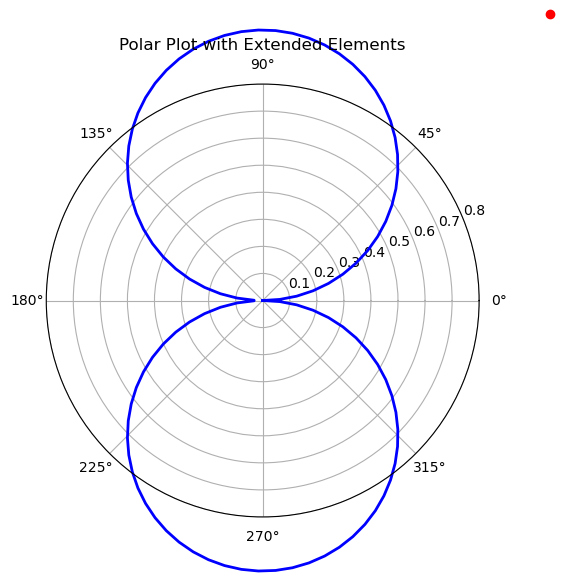

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure and polar axes with extra space
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='polar')

# Configure axes to allow drawing outside plot area
# ax.set_clip_on(False)

# Draw a line that extends outside the polar plot
theta = np.linspace(0, 2*np.pi, 100)
r = np.abs(np.sin(theta))
ax.plot(theta, r, color='blue', linewidth=2, 
        clip_on=None,  # Disable clipping
        transform=ax.transData)

ax.set_rlim(0, 0.8)

# Add a point outside the polar plot
point_theta = np.pi/4
point_r = 1.5
ax.plot(point_theta, point_r, 'ro', 
        clip_on=None,  # Disable clipping
        transform=ax.transData)

plt.title('Polar Plot with Extended Elements')
plt.tight_layout()
plt.show()

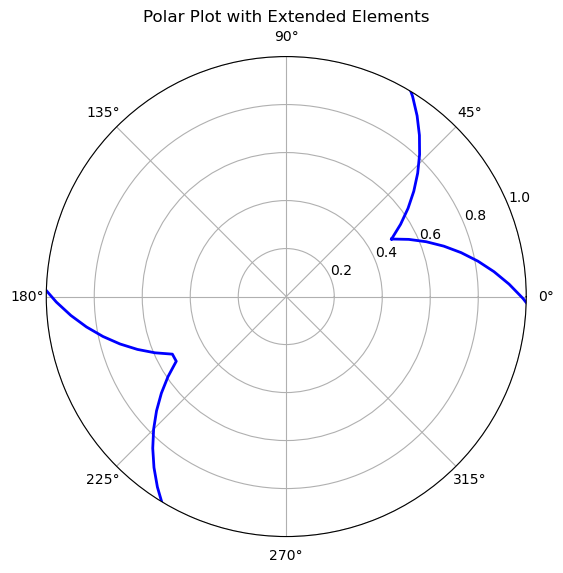

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

# Create figure with extra margins
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='polar')

ax.set_rlim(0, 1)

# Extend the figure margins
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Draw a line extending beyond polar plot
theta = np.linspace(0, 2*np.pi, 100)
r = np.abs(np.sin(theta))
line, = ax.plot(theta, r, color='blue', linewidth=2)

# Create a custom transform to extend beyond axes
trans = Affine2D().translate(0.5, 0.5) + ax.transData

# Redraw line with custom transform
line.set_transform(trans)

# Add point outside polar plot
point_theta = np.pi/4
point_r = 1.5
point, = ax.plot(point_theta, point_r, 'ro')
point.set_transform(trans)

plt.title('Polar Plot with Extended Elements')
plt.show()

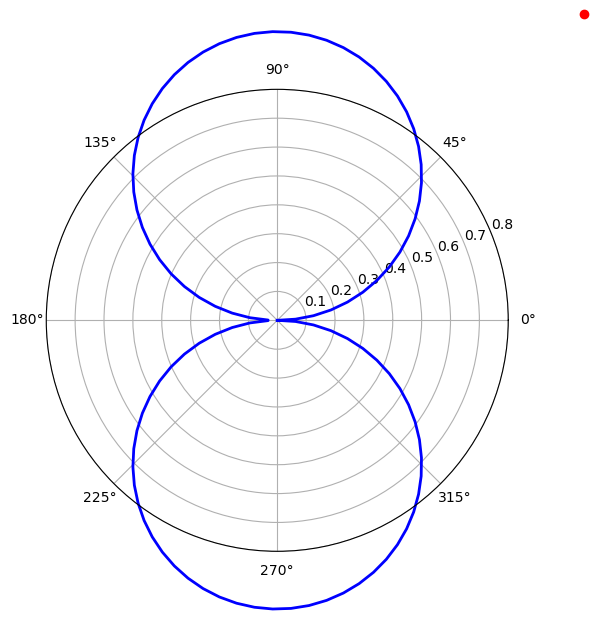

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Create figure
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, projection='polar')

ax.set_rlim(0, 0.8)

# Plot polar data
theta = np.linspace(0, 2*np.pi, 100)
r = np.abs(np.sin(theta))

# Use lower-level drawing methods to bypass clipping
ax.plot(theta, r, color='blue', linewidth=2, clip_on=False)
ax.plot(np.pi/4, 1.5, 'ro', clip_on=False)

# Remove plot boundaries
# ax.spines['polar'].set_visible(False)

plt.show()

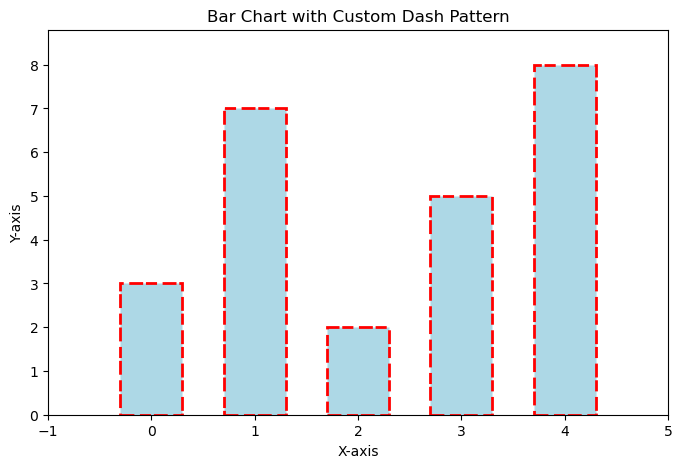

In [36]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

# Sample data
x = np.arange(5)
y = [3, 7, 2, 5, 8]

fig, ax = plt.subplots(figsize=(8, 5))

# Create bars with custom edge pattern
for i, height in enumerate(y):
    # Create rectangle with custom dash pattern
    rect = Rectangle((x[i]-0.3, 0), 0.6, height, 
                     edgecolor='red', 
                     facecolor='lightblue', 
                     linewidth=2,
                     linestyle=(0, (5, 2, 4, 1)))  # Custom dash pattern

    ax.add_patch(rect)

ax.set_xlim(x.min()-1, x.max()+1)
ax.set_ylim(0, max(y)*1.1)

plt.title('Bar Chart with Custom Dash Pattern')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()

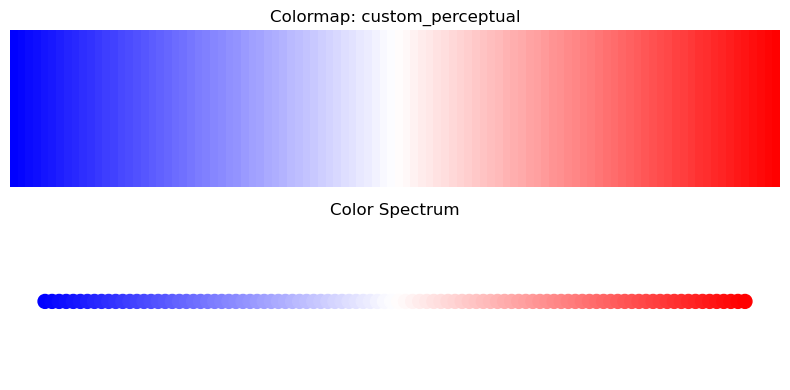

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def create_perceptual_colormap(colors, n_bins=256):
    """
    Create a perceptually uniform colormap from a list of colors.
    
    Parameters:
    -----------
    colors : list of str or tuple
        List of colors to interpolate between. Can be color names or RGB tuples.
    n_bins : int, optional
        Number of color gradations in the colormap (default 256)
    
    Returns:
    --------
    matplotlib.colors.LinearSegmentedColormap
        A custom perceptually uniform colormap
    """
    # Convert colors to RGBA
    def to_rgba(color):
        return plt.cm.colors.to_rgba(color)
    
    rgba_colors = [to_rgba(color) for color in colors]
    
    # Create color interpolation points
    color_points = np.linspace(0, 1, len(rgba_colors))
    
    # Prepare color dictionaries for LinearSegmentedColormap
    cdict = {
        'red': [(color_points[i], rgba_colors[i][0], rgba_colors[i][0]) 
                for i in range(len(color_points))],
        'green': [(color_points[i], rgba_colors[i][1], rgba_colors[i][1]) 
                  for i in range(len(color_points))],
        'blue': [(color_points[i], rgba_colors[i][2], rgba_colors[i][2]) 
                 for i in range(len(color_points))],
        'alpha': [(color_points[i], rgba_colors[i][3], rgba_colors[i][3]) 
                  for i in range(len(color_points))]
    }
    
    # Create the colormap
    custom_cmap = LinearSegmentedColormap('custom_perceptual', cdict, N=n_bins)
    
    return custom_cmap

def visualize_colormap(cmap, n_samples=100):
    """
    Visualize the created colormap.
    
    Parameters:
    -----------
    cmap : matplotlib.colors.Colormap
        Colormap to visualize
    n_samples : int, optional
        Number of samples to show in the visualization
    """
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 4))
    
    # Gradient plot
    gradient = np.linspace(0, 1, n_samples)
    gradient = np.vstack((gradient, gradient))
    
    ax1.imshow(gradient, aspect='auto', cmap=cmap)
    ax1.set_title(f'Colormap: {cmap.name}')
    ax1.axis('off')
    
    # Color spectrum plot
    spectrum = np.linspace(0, 1, n_samples)
    ax2.scatter(spectrum, np.zeros_like(spectrum), c=spectrum, cmap=cmap, s=100)
    ax2.set_title('Color Spectrum')
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == '__main__':
    # Create a custom colormap from a list of colors
    custom_cmap = create_perceptual_colormap(['blue', 'white', 'red'])
    
    # Visualize the colormap
    visualize_colormap(custom_cmap)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from colormath.color_objects import sRGBColor, LABColor
from colormath.color_conversions import convert_color

def rgb_to_lab(rgb):
    """
    Convert RGB color to CIELAB color space.
    
    Parameters:
    -----------
    rgb : tuple or array-like
        RGB color values (0-1 range)
    
    Returns:
    --------
    tuple
        L*, a*, b* values in CIELAB color space
    """
    # Convert RGB to colormath sRGB object
    rgb_obj = sRGBColor(rgb[0]*255, rgb[1]*255, rgb[2]*255)
    
    # Convert to LAB
    lab_obj = convert_color(rgb_obj, LABColor)
    
    return (lab_obj.lab_l, lab_obj.lab_a, lab_obj.lab_b)

def analyze_colormap_perception(cmap, n_samples=256):
    """
    Analyze the perceptual uniformity of a colormap.
    
    Parameters:
    -----------
    cmap : matplotlib.colors.Colormap
        Colormap to analyze
    n_samples : int, optional
        Number of samples to analyze in the colormap
    
    Returns:
    --------
    dict
        Colormap perception analysis metrics
    """
    # Generate color samples
    color_samples = [cmap(i/n_samples) for i in range(n_samples)]
    
    # Convert to CIELAB
    lab_values = [rgb_to_lab(color[:3]) for color in color_samples]
    
    # Analyze lightness progression
    lightness_values = [lab[0] for lab in lab_values]
    
    # Calculate metrics
    metrics = {
        'lightness_range': (min(lightness_values), max(lightness_values)),
        'lightness_monotonicity': _check_monotonicity(lightness_values),
        'lightness_std': np.std(lightness_values),
        'a_values': [lab[1] for lab in lab_values],
        'b_values': [lab[2] for lab in lab_values]
    }
    
    return metrics

def _check_monotonicity(values, tolerance=1e-5):
    """
    Check if a sequence of values is monotonically increasing.
    
    Parameters:
    -----------
    values : list or array-like
        Values to check for monotonicity
    tolerance : float, optional
        Tolerance for floating-point comparisons
    
    Returns:
    --------
    bool
        True if monotonically increasing, False otherwise
    """
    diffs = np.diff(values)
    return np.all(diffs >= -tolerance)

def visualize_colormap_analysis(cmap, metrics):
    """
    Create visualization of colormap analysis.
    
    Parameters:
    -----------
    cmap : matplotlib.colors.Colormap
        Colormap to visualize
    metrics : dict
        Colormap perception metrics
    """
    # Create figure with multiple subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Colormap Perception Analysis: {cmap.name}')
    
    # Lightness progression
    n_samples = 256
    lightness_values = [rgb_to_lab(cmap(i/n_samples)[:3])[0] for i in range(n_samples)]
    
    axes[0, 0].plot(lightness_values)
    axes[0, 0].set_title('Lightness Progression')
    axes[0, 0].set_xlabel('Color Sample')
    axes[0, 0].set_ylabel('Lightness (L*)')
    
    # Color samples gradient
    gradient = np.linspace(0, 1, n_samples)
    gradient = np.vstack((gradient, gradient))
    axes[0, 1].imshow(gradient, aspect='auto', cmap=cmap)
    axes[0, 1].set_title('Colormap Gradient')
    axes[0, 1].axis('off')
    
    # a* and b* values
    lab_values = [rgb_to_lab(cmap(i/n_samples)[:3]) for i in range(n_samples)]
    a_values = [lab[1] for lab in lab_values]
    b_values = [lab[2] for lab in lab_values]
    
    axes[1, 0].plot(a_values, label='a* (Red-Green)')
    axes[1, 0].plot(b_values, label='b* (Blue-Yellow)')
    axes[1, 0].set_title('CIELAB Color Components')
    axes[1, 0].set_xlabel('Color Sample')
    axes[1, 0].set_ylabel('Color Component Value')
    axes[1, 0].legend()
    
    # Text box with metrics
    metrics_text = '\n'.join([
        f'Lightness Range: {metrics["lightness_range"]}',
        f'Monotonically Increasing: {metrics["lightness_monotonicity"]}',
        f'Lightness Std Dev: {metrics["lightness_std"]:.2f}'
    ])
    axes[1, 1].text(0.5, 0.5, metrics_text, 
                    horizontalalignment='center', 
                    verticalalignment='center',
                    bbox=dict(facecolor='white', alpha=0.7))
    axes[1, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage
if __name__ == '__main__':
    # Analyze a few different colormaps
    colormaps_to_analyze = [
        plt.cm.viridis,
        plt.cm.plasma,
        plt.cm.inferno,
        plt.cm.magma
    ]
    
    for cmap in colormaps_to_analyze:
        print(f"\nAnalyzing {cmap.name} colormap:")
        metrics = analyze_colormap_perception(cmap)
        print(metrics)
        visualize_colormap_analysis(cmap, metrics)

ModuleNotFoundError: No module named 'colormath'